In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras

2.9.1


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


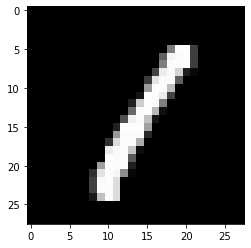

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
# find the unique labels (as numbers in this case)
labels_unique = np.unique(Y_train)

# find the total number of unique classes
num_classes = len(labels_unique)

print('Total number of classes : ', num_classes)
print('Unique labels : ', labels_unique)

Total number of classes :  10
Unique labels :  [0 1 2 3 4 5 6 7 8 9]


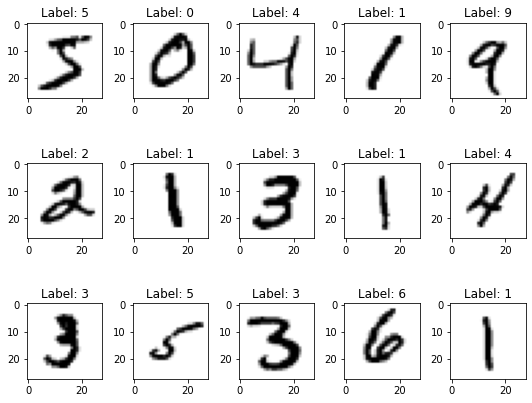

In [10]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap=plt.cm.binary)
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

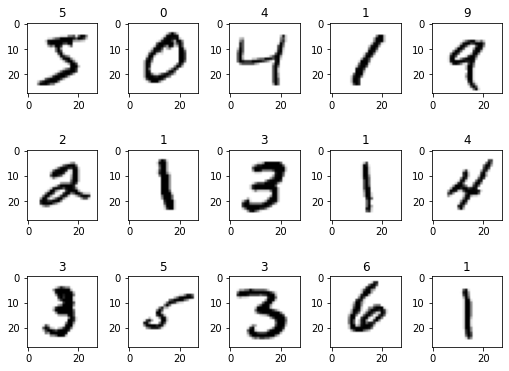

In [9]:
class_names = {i:cn for i, cn in enumerate(['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']) }
    

def plot(images, labels, predictions=None):
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*num_col,3*num_row))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes[i//num_col, i%num_col]
        #ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(class_names[y_true])
        plt.subplots_adjust(left=0.01,bottom=1,right=0.7,top=1.5,wspace=0.1,hspace=.8)
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        #ax.set_xticks([])
        #ax.set_yticks([])
    #plt.tight_layout()
    #plt.show()

# plot first few images
#plt.savefig('Fashion_MNIST.png', dpi=600)
plot(X_train[:15], Y_train[:15]) 